In [2]:
# https://biblio.wiki/wiki/From_Russia_with_Love

import nltk
from nltk.corpus import stopwords
import math
%matplotlib inline

raw1 = open('From_Russia_with_Love.txt').read()

In [3]:
raw1

'1 ROSELAND\n\n\nThe naked man who lay splayed out on his face beside the swimming pool might have been dead.\n\nHe might have been drowned and fished out of the pool and laid out on the grass to dry while the police or the next-of-kin were summoned. Even the little pile of objects in the grass beside his head might have been his personal effects, meticulously assembled in full view so that no one should think that something had been stolen by his rescuers.\n\nTo judge by the glittering pile, this had been, or was, a rich man. It contained the typical membership badges of the rich man’s club – a money clip, made of a Mexican fifty-dollar piece and holding a substantial wad of banknotes, a well-used gold Dunhill lighter, an oval gold cigarette case with the wavy ridges and discreet turquoise button that means Fabergé, and the sort of novel a rich man pulls out of the bookcase to take into the garden – The Little Nugget – an old P. G. Wodehouse. There was also a bulky gold wrist-watch on

In [4]:
tokens1 = nltk.word_tokenize(raw1)
sentence1 = nltk.sent_tokenize(raw1)

In [5]:
#The number of token
len(tokens1)

94872

In [6]:
len(sentence1)

6195

In [7]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #to make base form

tokens_low = [w.lower() for w in tokens1]

#The number of sort of words
len(set(tokens_low))

#複数形や過去形を別の単語としてカウントしてしまっているため，実際の異なり語数はさらに少ない

8417

In [8]:
print (len(set(tokens_low))/len(tokens1))

0.08871953790370184


In [9]:
list1 = [tokens1]

text = []
for i in list1:
    text.append(nltk.Text(i))
    
text

[<Text: 1 ROSELAND The naked man who lay splayed...>]

In [10]:
freq_list = []
for i in text:
    freq_list.append(nltk.FreqDist(w.lower() for w in i))

stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')', '...', "'s", '’', '”', '“','–','—', '…', '*' ,'``', "''",'--','mr.',"n't", 'dr.','sir', '‘', 'mr', 'm.' ]

In [11]:
freq_list

[FreqDist({'1': 3,
           'roseland': 1,
           'the': 6207,
           'naked': 15,
           'man': 349,
           'who': 145,
           'lay': 14,
           'splayed': 1,
           'out': 360,
           'on': 737,
           'his': 958,
           'face': 129,
           'beside': 53,
           'swimming': 3,
           'pool': 10,
           'might': 48,
           'have': 372,
           'been': 227,
           'dead': 24,
           '.': 5790,
           'he': 1299,
           'drowned': 3,
           'and': 2566,
           'fished': 4,
           'of': 2442,
           'laid': 10,
           'grass': 18,
           'to': 1783,
           'dry': 8,
           'while': 41,
           'police': 12,
           'or': 171,
           'next-of-kin': 1,
           'were': 267,
           'summoned': 1,
           'even': 57,
           'little': 72,
           'pile': 8,
           'objects': 1,
           'in': 1177,
           'head': 137,
           'personal': 10,
  

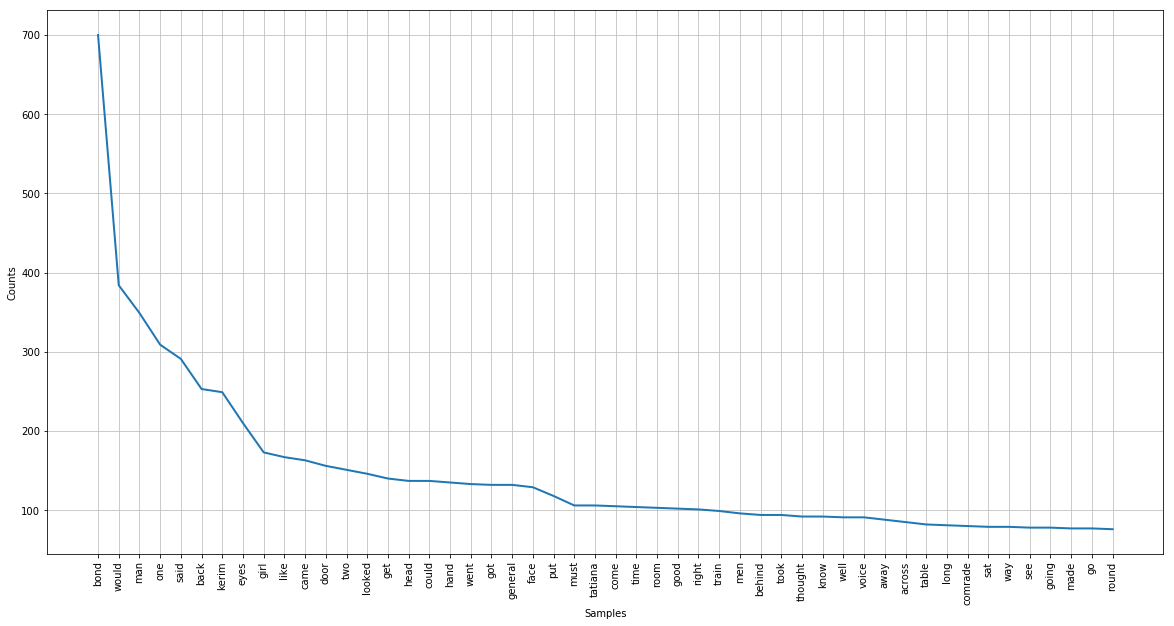

In [12]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [13]:
#順位チェック
sorted(freq_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('bond', 700),
 ('would', 384),
 ('man', 349),
 ('one', 309),
 ('said', 291),
 ('back', 253),
 ('kerim', 249),
 ('eyes', 210),
 ('girl', 173),
 ('like', 167),
 ('came', 163),
 ('door', 156),
 ('two', 151),
 ('looked', 146),
 ('get', 140),
 ('head', 137),
 ('could', 137),
 ('hand', 135),
 ('went', 133),
 ('got', 132),
 ('general', 132),
 ('face', 129),
 ('put', 118),
 ('must', 106),
 ('tatiana', 106),
 ('come', 105),
 ('time', 104),
 ('room', 103),
 ('good', 102),
 ('right', 101),
 ('train', 99),
 ('men', 96),
 ('behind', 94),
 ('took', 94),
 ('thought', 92),
 ('know', 92),
 ('well', 91),
 ('voice', 91),
 ('away', 88),
 ('across', 85),
 ('table', 82),
 ('long', 81),
 ('comrade', 80),
 ('sat', 79),
 ('way', 79),
 ('see', 78),
 ('going', 78),
 ('made', 77),
 ('go', 77),
 ('round', 76),
 ('turned', 73),
 ('little', 72),
 ('old', 72),
 ('grant', 72),
 ('g.', 71),
 ('black', 71),
 ('much', 71),
 ('think', 70),
 ('nash', 70),
 ('left', 69),
 ('look', 69),
 ('take', 68),
 ('nothing', 68),
 ('

In [14]:
#Turn all words to basic form
basic_form = [ps.stem(word) for word in tokens_low if not word in stopwords + symbols]
basic_form

In [15]:
#Textを使うためにreviewをlistにぶち込む
basic_form = [basic_form]

In [16]:
#原型に戻した単語で、再び文を再構築する。
text = []
for i in basic_form:
    text.append(nltk.Text(i))
    
text

[<Text: 1 roseland nake man lay splay face besid...>]

In [17]:
#Textからwords listを作る。
for i in text:
    words = [word for word in i]
    
words

['1',
 'roseland',
 'nake',
 'man',
 'lay',
 'splay',
 'face',
 'besid',
 'swim',
 'pool',
 'might',
 'dead',
 'might',
 'drown',
 'fish',
 'pool',
 'laid',
 'grass',
 'dri',
 'polic',
 'next-of-kin',
 'summon',
 'even',
 'littl',
 'pile',
 'object',
 'grass',
 'besid',
 'head',
 'might',
 'person',
 'effect',
 'meticul',
 'assembl',
 'full',
 'view',
 'one',
 'think',
 'someth',
 'stolen',
 'rescuer',
 'judg',
 'glitter',
 'pile',
 'rich',
 'man',
 'contain',
 'typic',
 'membership',
 'badg',
 'rich',
 'man',
 'club',
 'money',
 'clip',
 'made',
 'mexican',
 'fifty-dollar',
 'piec',
 'hold',
 'substanti',
 'wad',
 'banknot',
 'well-us',
 'gold',
 'dunhil',
 'lighter',
 'oval',
 'gold',
 'cigarett',
 'case',
 'wavi',
 'ridg',
 'discreet',
 'turquois',
 'button',
 'mean',
 'fabergé',
 'sort',
 'novel',
 'rich',
 'man',
 'pull',
 'bookcas',
 'take',
 'garden',
 'littl',
 'nugget',
 'old',
 'p.',
 'g.',
 'wodehous',
 'also',
 'bulki',
 'gold',
 'wrist-watch',
 'well-us',
 'brown',
 'croco

In [19]:
#Basic に直して、頻度を確認する
freq_list_basic = []
for i in text:
    freq_list_basic.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))
freq_list_basic

[FreqDist({'1': 3,
           'roseland': 1,
           'nake': 15,
           'man': 349,
           'lay': 14,
           'splay': 1,
           'face': 158,
           'besid': 55,
           'swim': 3,
           'pool': 13,
           'might': 48,
           'dead': 24,
           'drown': 4,
           'fish': 12,
           'laid': 10,
           'grass': 18,
           'dri': 11,
           'polic': 12,
           'next-of-kin': 1,
           'summon': 3,
           'even': 76,
           'littl': 72,
           'pile': 10,
           'object': 10,
           'head': 145,
           'person': 16,
           'effect': 10,
           'meticul': 2,
           'assembl': 1,
           'full': 29,
           'view': 12,
           'one': 321,
           'think': 83,
           'someth': 67,
           'stolen': 3,
           'rescuer': 1,
           'judg': 1,
           'glitter': 15,
           'rich': 8,
           'contain': 12,
           'typic': 4,
           'membership': 1,

In [20]:
#順位チェック
sorted(freq_list_basic[0].items(), key=lambda x: x[1], reverse=True)

[('bond', 700),
 ('would', 384),
 ('man', 349),
 ('one', 321),
 ('said', 291),
 ('look', 269),
 ('back', 260),
 ('kerim', 249),
 ('eye', 228),
 ('hand', 222),
 ('girl', 195),
 ('like', 182),
 ('door', 164),
 ('came', 163),
 ('get', 159),
 ('face', 158),
 ('go', 158),
 ('two', 151),
 ('head', 145),
 ('come', 141),
 ('could', 137),
 ('gener', 134),
 ('went', 133),
 ('got', 132),
 ('put', 123),
 ('know', 118),
 ('thought', 115),
 ('time', 114),
 ('train', 114),
 ('room', 110),
 ('must', 106),
 ('tatiana', 106),
 ('good', 104),
 ('right', 103),
 ('men', 96),
 ('behind', 94),
 ('took', 94),
 ('turn', 94),
 ('voic', 93),
 ('comrad', 93),
 ('work', 91),
 ('well', 91),
 ('away', 88),
 ('see', 87),
 ('watch', 86),
 ('across', 85),
 ('long', 85),
 ('tabl', 85),
 ('think', 83),
 ('want', 82),
 ('open', 81),
 ('way', 81),
 ('take', 79),
 ('sat', 79),
 ('round', 79),
 ('say', 78),
 ('made', 77),
 ('even', 76),
 ('day', 75),
 ('black', 74),
 ('side', 73),
 ('walk', 73),
 ('grant', 73),
 ('make', 73)

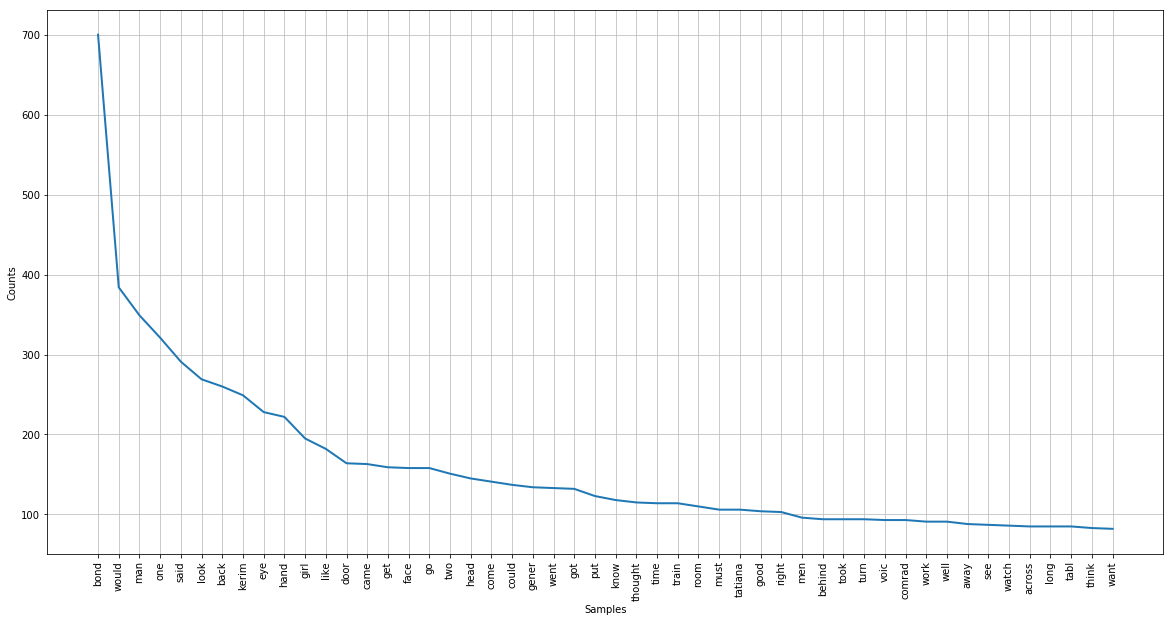

In [21]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [22]:
#文章を小文字化
sentence_small = [w.lower() for w in sentence1]
sentence_small

['1 roseland\n\n\nthe naked man who lay splayed out on his face beside the swimming pool might have been dead.',
 'he might have been drowned and fished out of the pool and laid out on the grass to dry while the police or the next-of-kin were summoned.',
 'even the little pile of objects in the grass beside his head might have been his personal effects, meticulously assembled in full view so that no one should think that something had been stolen by his rescuers.',
 'to judge by the glittering pile, this had been, or was, a rich man.',
 'it contained the typical membership badges of the rich man’s club – a money clip, made of a mexican fifty-dollar piece and holding a substantial wad of banknotes, a well-used gold dunhill lighter, an oval gold cigarette case with the wavy ridges and discreet turquoise button that means fabergé, and the sort of novel a rich man pulls out of the bookcase to take into the garden – the little nugget – an old p. g. wodehouse.',
 'there was also a bulky gold

In [23]:
#いけそう。文ごとに取り出し、それぞれの単語を原型に戻す。それを再び再構築する！
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    print (form)

['1', 'roseland', 'nake', 'man', 'lay', 'splay', 'face', 'besid', 'swim', 'pool', 'might', 'dead.']
['might', 'drown', 'fish', 'pool', 'laid', 'grass', 'dri', 'polic', 'next-of-kin', 'summoned.']
['even', 'littl', 'pile', 'object', 'grass', 'besid', 'head', 'might', 'person', 'effects,', 'meticul', 'assembl', 'full', 'view', 'one', 'think', 'someth', 'stolen', 'rescuers.']
['judg', 'glitter', 'pile,', 'been,', 'was,', 'rich', 'man.']
['contain', 'typic', 'membership', 'badg', 'rich', 'man’', 'club', 'money', 'clip,', 'made', 'mexican', 'fifty-dollar', 'piec', 'hold', 'substanti', 'wad', 'banknotes,', 'well-us', 'gold', 'dunhil', 'lighter,', 'oval', 'gold', 'cigarett', 'case', 'wavi', 'ridg', 'discreet', 'turquois', 'button', 'mean', 'fabergé,', 'sort', 'novel', 'rich', 'man', 'pull', 'bookcas', 'take', 'garden', 'littl', 'nugget', 'old', 'p.', 'g.', 'wodehouse.']
['also', 'bulki', 'gold', 'wrist-watch', 'well-us', 'brown', 'crocodil', 'strap.']
['girard-perregaux', 'model', 'design', '

In [24]:
#上の本番
form_sent = []
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    form_sent.append(" ".join(form))

In [25]:
#ピリオドやカンマを消しまーす。Delte period and comma...めんどい...
form_sent2 = []

for i in form_sent:
    tokens = nltk.word_tokenize(i)
    form = [word for word in tokens if not word in stopwords + symbols]
    form_sent2.append(" ".join(form))
    

In [27]:
#次にこの新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化したい
text = []

for i in form_sent2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        text.append(j)
        
text = [text]

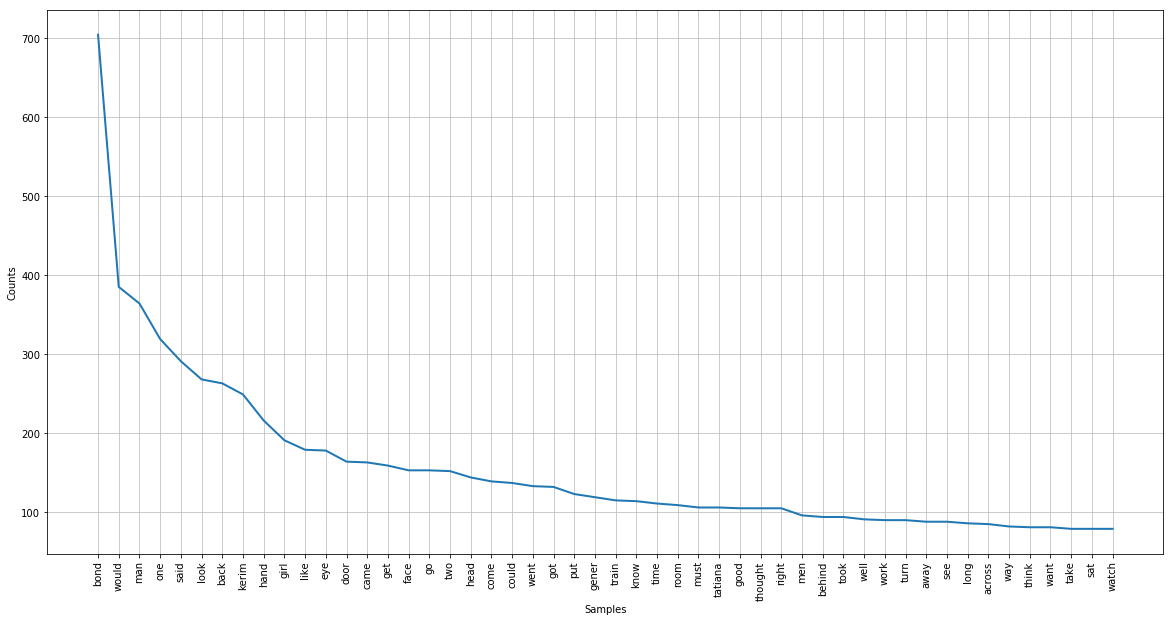

In [28]:
#新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

f_list_new = []
for i in text:
    f_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in f_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [29]:
log_freq  = []
for i in f_list_new[0].values():
    log_freq.append(i)

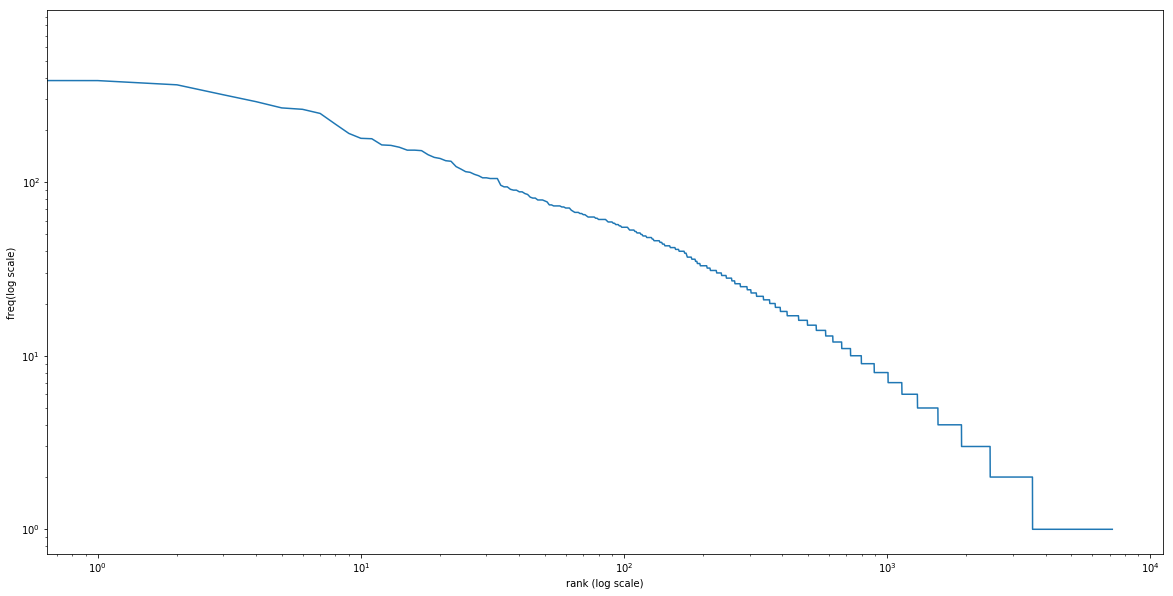

In [30]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_freq, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('freq(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

In [31]:
#順位チェック
sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('bond', 704),
 ('would', 385),
 ('man', 364),
 ('one', 319),
 ('said', 291),
 ('look', 268),
 ('back', 263),
 ('kerim', 249),
 ('hand', 216),
 ('girl', 191),
 ('like', 179),
 ('eye', 178),
 ('door', 164),
 ('came', 163),
 ('get', 159),
 ('face', 153),
 ('go', 153),
 ('two', 152),
 ('head', 144),
 ('come', 139),
 ('could', 137),
 ('went', 133),
 ('got', 132),
 ('put', 123),
 ('gener', 119),
 ('train', 115),
 ('know', 114),
 ('time', 111),
 ('room', 109),
 ('must', 106),
 ('tatiana', 106),
 ('good', 105),
 ('thought', 105),
 ('right', 105),
 ('men', 96),
 ('behind', 94),
 ('took', 94),
 ('well', 91),
 ('work', 90),
 ('turn', 90),
 ('away', 88),
 ('see', 88),
 ('long', 86),
 ('across', 85),
 ('way', 82),
 ('think', 81),
 ('want', 81),
 ('take', 79),
 ('sat', 79),
 ('watch', 79),
 ('round', 78),
 ('made', 77),
 ('open', 74),
 ('black', 74),
 ('walk', 73),
 ('grant', 73),
 ('say', 73),
 ('make', 73),
 ('old', 72),
 ('day', 72),
 ('g.', 71),
 ('much', 71),
 ('nash', 71),
 ('left', 69),
 ('

In [32]:
# let's make new list only with words whose frequency  > 25

moreThan25_freq = []

for i,j in f_list_new[0].items():
    if j >= 25:
        moreThan25_freq.append(i)

In [33]:
# 頻出単語top2のgameshとsaidが同時に現れる文を、ピックアップしカウントするプログラムを全ての単語に割り当てる試み。

count_s = {}

for wn1 in range(0, len(moreThan25_freq)-1):
    for wn2 in range(wn1+1, len(moreThan25_freq)):
        s = 0
    
        for sent in form_sent2:
            index1 = 0
            index2 = 0
            
            #remove duplicate
            if moreThan25_freq[wn1] != moreThan25_freq[wn2]:
                
                if moreThan25_freq[wn1] in sent.split():
                    index1 += 1
                if moreThan25_freq[wn2] in sent.split():
                    index2 += 1
              
                if index1 > 0 and index2 > 0:
                    s += 1
                
        count_s.update({( moreThan25_freq[wn1], moreThan25_freq[wn2]) :s })
        

In [34]:
#順位チェック
sorted(count_s.items(), key=lambda x: x[1], reverse=True)

[(('g.', 'gener'), 66),
 (('look', 'bond'), 60),
 (('bond', 'kerim'), 57),
 (('said', 'bond'), 55),
 (('man', 'bond'), 46),
 (('hand', 'bond'), 44),
 (('klebb', 'rosa'), 41),
 (('back', 'bond'), 39),
 (('man', 'old'), 37),
 (('would', 'bond'), 37),
 (('thought', 'bond'), 37),
 (('one', 'bond'), 32),
 (('face', 'bond'), 31),
 (('one', 'would'), 31),
 (('door', 'bond'), 31),
 (('open', 'door'), 30),
 (('like', 'look'), 27),
 (('look', 'eye'), 27),
 (('eye', 'bond'), 27),
 (('put', 'bond'), 27),
 (('man', 'would'), 26),
 (('turn', 'bond'), 26),
 (('got', 'v'), 26),
 (('back', 'hand'), 25),
 (('went', 'bond'), 25),
 (('man', 'one'), 24),
 (('face', 'look'), 24),
 (('look', 'back'), 23),
 (('felt', 'bond'), 23),
 (('said', 'kerim'), 23),
 (('got', 'bond'), 23),
 (('one', 'like'), 22),
 (('like', 'would'), 22),
 (('one', 'said'), 21),
 (('two', 'bond'), 21),
 (('look', 'kerim'), 21),
 (('back', 'sat'), 21),
 (('back', 'kerim'), 21),
 (('come', 'would'), 21),
 (('would', 'said'), 21),
 (('min

In [35]:
#namely

new = {tuple(sorted(x)):y for x, y in count_s.items()}

In [36]:
#順位チェック again !
new2 = dict(sorted(new.items(), key=lambda x: x[1], reverse=True))
new2

{('g.', 'gener'): 66,
 ('bond', 'look'): 60,
 ('bond', 'kerim'): 57,
 ('bond', 'said'): 55,
 ('bond', 'man'): 46,
 ('bond', 'hand'): 44,
 ('klebb', 'rosa'): 41,
 ('back', 'bond'): 39,
 ('man', 'old'): 37,
 ('bond', 'would'): 37,
 ('bond', 'thought'): 37,
 ('bond', 'one'): 32,
 ('bond', 'face'): 31,
 ('one', 'would'): 31,
 ('bond', 'door'): 31,
 ('door', 'open'): 30,
 ('like', 'look'): 27,
 ('eye', 'look'): 27,
 ('bond', 'eye'): 27,
 ('bond', 'put'): 27,
 ('man', 'would'): 26,
 ('bond', 'turn'): 26,
 ('got', 'v'): 26,
 ('back', 'hand'): 25,
 ('bond', 'went'): 25,
 ('man', 'one'): 24,
 ('face', 'look'): 24,
 ('back', 'look'): 23,
 ('bond', 'felt'): 23,
 ('kerim', 'said'): 23,
 ('bond', 'got'): 23,
 ('like', 'one'): 22,
 ('like', 'would'): 22,
 ('one', 'said'): 21,
 ('bond', 'two'): 21,
 ('kerim', 'look'): 21,
 ('back', 'sat'): 21,
 ('back', 'kerim'): 21,
 ('come', 'would'): 21,
 ('said', 'would'): 21,
 ('bond', 'mind'): 21,
 ('bond', 'head'): 20,
 ('back', 'went'): 20,
 ('get', 'would'):

In [37]:
new3 = dict((k, v) for k, v in new2.items() if v >= 2)
new3

{('g.', 'gener'): 66,
 ('bond', 'look'): 60,
 ('bond', 'kerim'): 57,
 ('bond', 'said'): 55,
 ('bond', 'man'): 46,
 ('bond', 'hand'): 44,
 ('klebb', 'rosa'): 41,
 ('back', 'bond'): 39,
 ('man', 'old'): 37,
 ('bond', 'would'): 37,
 ('bond', 'thought'): 37,
 ('bond', 'one'): 32,
 ('bond', 'face'): 31,
 ('one', 'would'): 31,
 ('bond', 'door'): 31,
 ('door', 'open'): 30,
 ('like', 'look'): 27,
 ('eye', 'look'): 27,
 ('bond', 'eye'): 27,
 ('bond', 'put'): 27,
 ('man', 'would'): 26,
 ('bond', 'turn'): 26,
 ('got', 'v'): 26,
 ('back', 'hand'): 25,
 ('bond', 'went'): 25,
 ('man', 'one'): 24,
 ('face', 'look'): 24,
 ('back', 'look'): 23,
 ('bond', 'felt'): 23,
 ('kerim', 'said'): 23,
 ('bond', 'got'): 23,
 ('like', 'one'): 22,
 ('like', 'would'): 22,
 ('one', 'said'): 21,
 ('bond', 'two'): 21,
 ('kerim', 'look'): 21,
 ('back', 'sat'): 21,
 ('back', 'kerim'): 21,
 ('come', 'would'): 21,
 ('said', 'would'): 21,
 ('bond', 'mind'): 21,
 ('bond', 'head'): 20,
 ('back', 'went'): 20,
 ('get', 'would'):

In [38]:
#順位チェック again !
new4 = dict(sorted(new3.items(), key=lambda x: x[1], reverse=True))
new4

{('g.', 'gener'): 66,
 ('bond', 'look'): 60,
 ('bond', 'kerim'): 57,
 ('bond', 'said'): 55,
 ('bond', 'man'): 46,
 ('bond', 'hand'): 44,
 ('klebb', 'rosa'): 41,
 ('back', 'bond'): 39,
 ('man', 'old'): 37,
 ('bond', 'would'): 37,
 ('bond', 'thought'): 37,
 ('bond', 'one'): 32,
 ('bond', 'face'): 31,
 ('one', 'would'): 31,
 ('bond', 'door'): 31,
 ('door', 'open'): 30,
 ('like', 'look'): 27,
 ('eye', 'look'): 27,
 ('bond', 'eye'): 27,
 ('bond', 'put'): 27,
 ('man', 'would'): 26,
 ('bond', 'turn'): 26,
 ('got', 'v'): 26,
 ('back', 'hand'): 25,
 ('bond', 'went'): 25,
 ('man', 'one'): 24,
 ('face', 'look'): 24,
 ('back', 'look'): 23,
 ('bond', 'felt'): 23,
 ('kerim', 'said'): 23,
 ('bond', 'got'): 23,
 ('like', 'one'): 22,
 ('like', 'would'): 22,
 ('one', 'said'): 21,
 ('bond', 'two'): 21,
 ('kerim', 'look'): 21,
 ('back', 'sat'): 21,
 ('back', 'kerim'): 21,
 ('come', 'would'): 21,
 ('said', 'would'): 21,
 ('bond', 'mind'): 21,
 ('bond', 'head'): 20,
 ('back', 'went'): 20,
 ('get', 'would'):

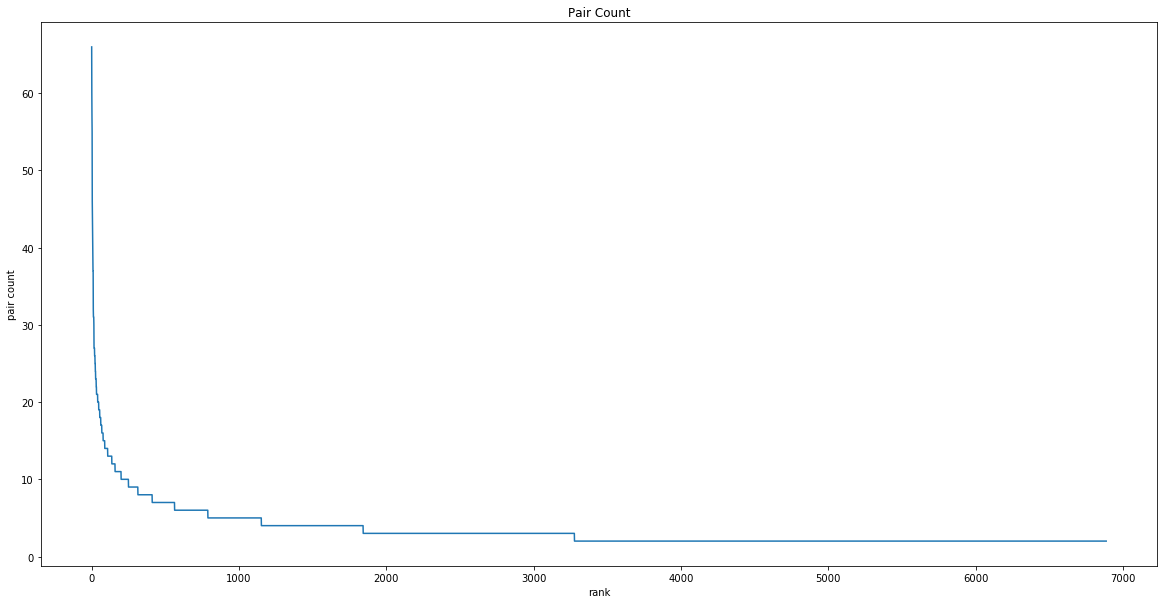

In [47]:
import matplotlib.pyplot as plt

pair_count = []
for pair, count in new4.items():
    pair_count.append(count)
    
plt.figure(figsize=(20,10))
plt.plot(sorted(pair_count, reverse=True))

plt.title('Pair Count')
plt.ylabel('pair count')
plt.xlabel('rank')
plt.show()
    
    



In [48]:
#単語順位チェック
word_f = sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)
word_f

[('bond', 704),
 ('would', 385),
 ('man', 364),
 ('one', 319),
 ('said', 291),
 ('look', 268),
 ('back', 263),
 ('kerim', 249),
 ('hand', 216),
 ('girl', 191),
 ('like', 179),
 ('eye', 178),
 ('door', 164),
 ('came', 163),
 ('get', 159),
 ('face', 153),
 ('go', 153),
 ('two', 152),
 ('head', 144),
 ('come', 139),
 ('could', 137),
 ('went', 133),
 ('got', 132),
 ('put', 123),
 ('gener', 119),
 ('train', 115),
 ('know', 114),
 ('time', 111),
 ('room', 109),
 ('must', 106),
 ('tatiana', 106),
 ('good', 105),
 ('thought', 105),
 ('right', 105),
 ('men', 96),
 ('behind', 94),
 ('took', 94),
 ('well', 91),
 ('work', 90),
 ('turn', 90),
 ('away', 88),
 ('see', 88),
 ('long', 86),
 ('across', 85),
 ('way', 82),
 ('think', 81),
 ('want', 81),
 ('take', 79),
 ('sat', 79),
 ('watch', 79),
 ('round', 78),
 ('made', 77),
 ('open', 74),
 ('black', 74),
 ('walk', 73),
 ('grant', 73),
 ('say', 73),
 ('make', 73),
 ('old', 72),
 ('day', 72),
 ('g.', 71),
 ('much', 71),
 ('nash', 71),
 ('left', 69),
 ('

In [49]:
word_fdic = dict(word_f)
word_fdic

{'bond': 704,
 'would': 385,
 'man': 364,
 'one': 319,
 'said': 291,
 'look': 268,
 'back': 263,
 'kerim': 249,
 'hand': 216,
 'girl': 191,
 'like': 179,
 'eye': 178,
 'door': 164,
 'came': 163,
 'get': 159,
 'face': 153,
 'go': 153,
 'two': 152,
 'head': 144,
 'come': 139,
 'could': 137,
 'went': 133,
 'got': 132,
 'put': 123,
 'gener': 119,
 'train': 115,
 'know': 114,
 'time': 111,
 'room': 109,
 'must': 106,
 'tatiana': 106,
 'good': 105,
 'thought': 105,
 'right': 105,
 'men': 96,
 'behind': 94,
 'took': 94,
 'well': 91,
 'work': 90,
 'turn': 90,
 'away': 88,
 'see': 88,
 'long': 86,
 'across': 85,
 'way': 82,
 'think': 81,
 'want': 81,
 'take': 79,
 'sat': 79,
 'watch': 79,
 'round': 78,
 'made': 77,
 'open': 74,
 'black': 74,
 'walk': 73,
 'grant': 73,
 'say': 73,
 'make': 73,
 'old': 72,
 'day': 72,
 'g.': 71,
 'much': 71,
 'nash': 71,
 'left': 69,
 'side': 68,
 'even': 67,
 'littl': 67,
 'colonel': 67,
 'first': 66,
 'secret': 66,
 'woman': 65,
 'comrad': 65,
 'kronsteen': 64,

In [51]:
count = 0
s_value = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    s_value.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
count = 0
p_values = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    p = (word_fdic[i[0]]  * word_fdic[i[1]]) * s * s
    p_values.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [52]:
p_values

[0.5155639720677003,
 0.019080732700135685,
 0.018534364731653888,
 0.014765893470790381,
 0.008257367632367632,
 0.01273148148148148,
 0.5741120218579235,
 0.00821487210508123,
 0.05223595848595849,
 0.005050914994096812,
 0.018520021645021645,
 0.004559703619264748,
 0.008921939988116459,
 0.007824777103773967,
 0.008323517184035479,
 0.07415952537903758,
 0.015196364545985155,
 0.015281737380513164,
 0.005817479570990807,
 0.00841879157427938,
 0.004823747680890538,
 0.010669191919191919,
 0.10669191919191921,
 0.011001971553302351,
 0.006675068352699932,
 0.004960556684694616,
 0.014047410008779631,
 0.0075052494183077,
 0.013662190082644625,
 0.0073006803847693175,
 0.005692579201101928,
 0.00847620882296282,
 0.00702314445331205,
 0.004750670587855088,
 0.004121187200956938,
 0.00660852364682611,
 0.021225393463926455,
 0.00673416097851482,
 0.008240680183126226,
 0.0039362699156513595,
 0.010800352664576802,
 0.003945707070707071,
 0.01143543268818434,
 0.006534346156987667,
 0.

In [53]:
max(p_values)

0.5741120218579235

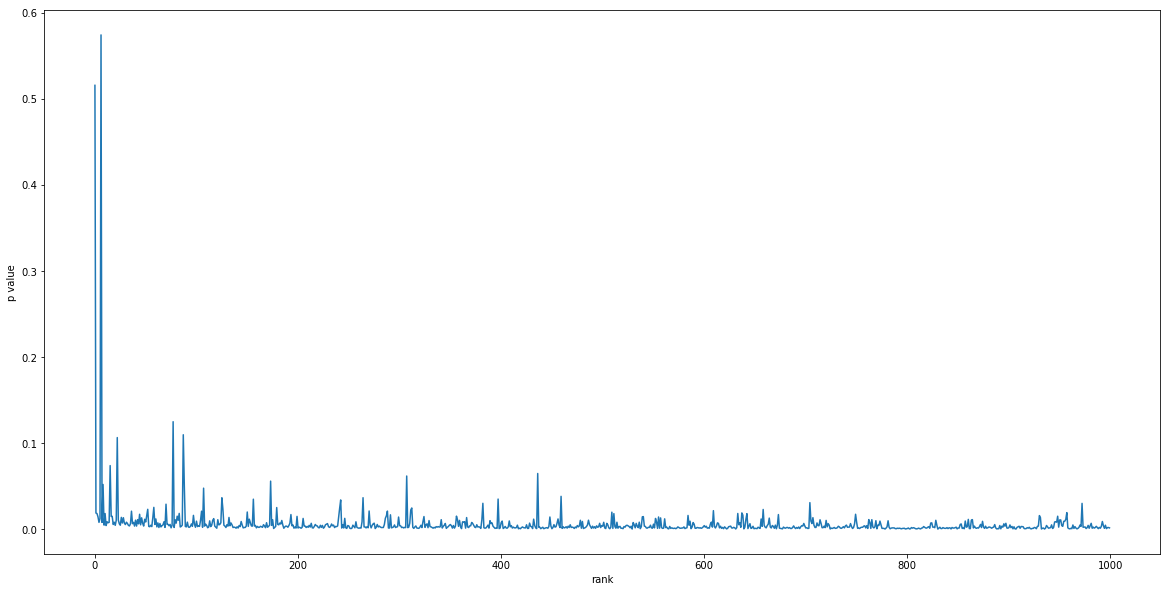

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(p_values)

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

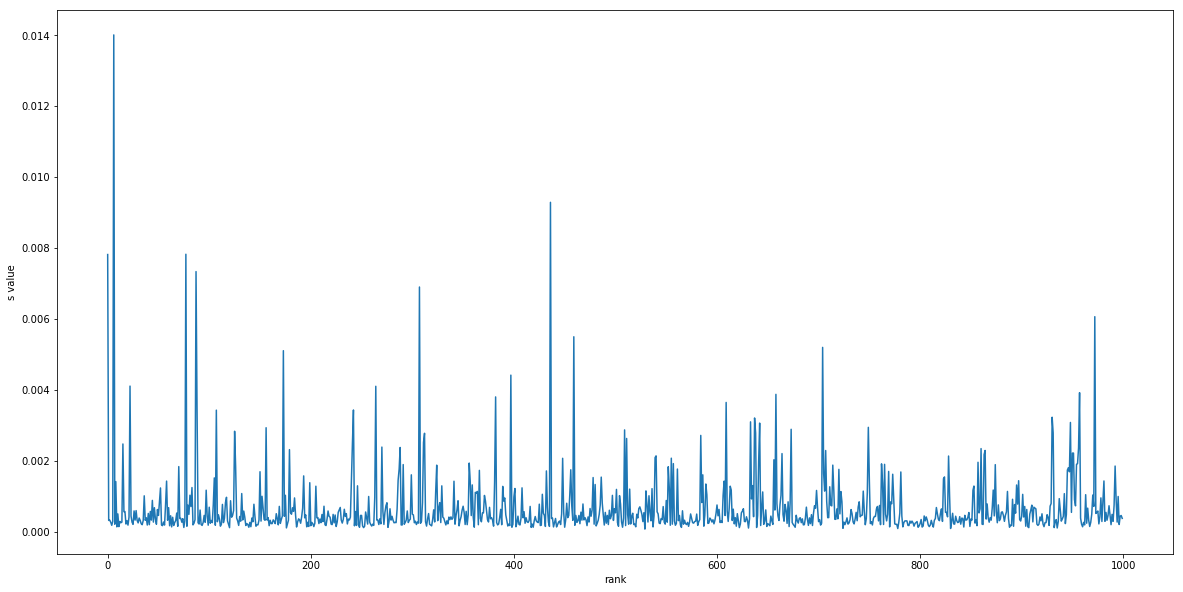

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(s_value)

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

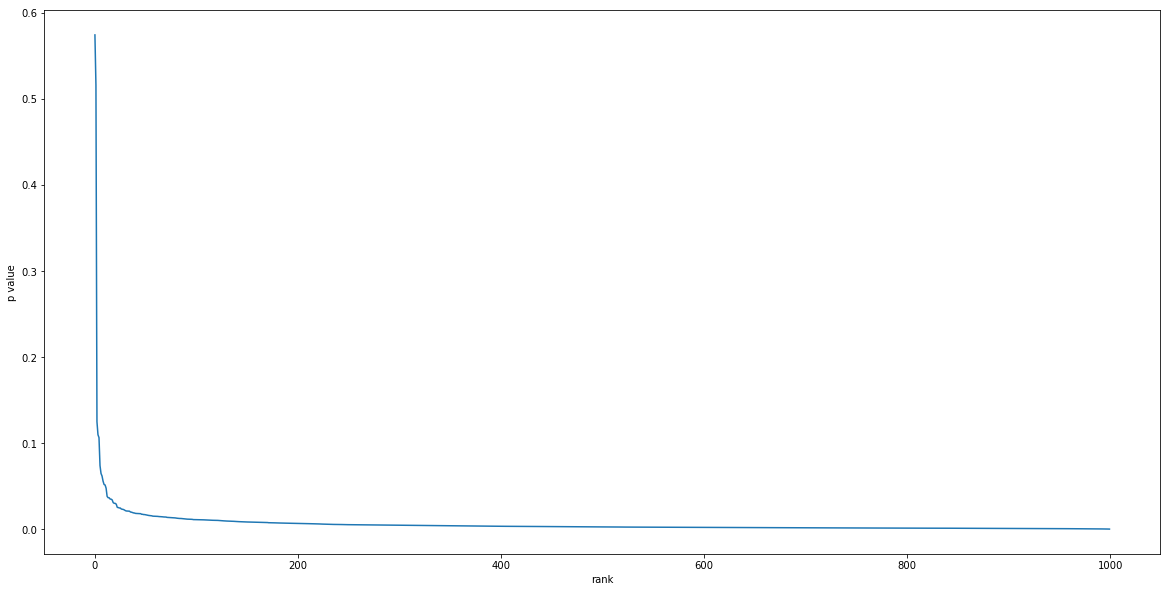

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

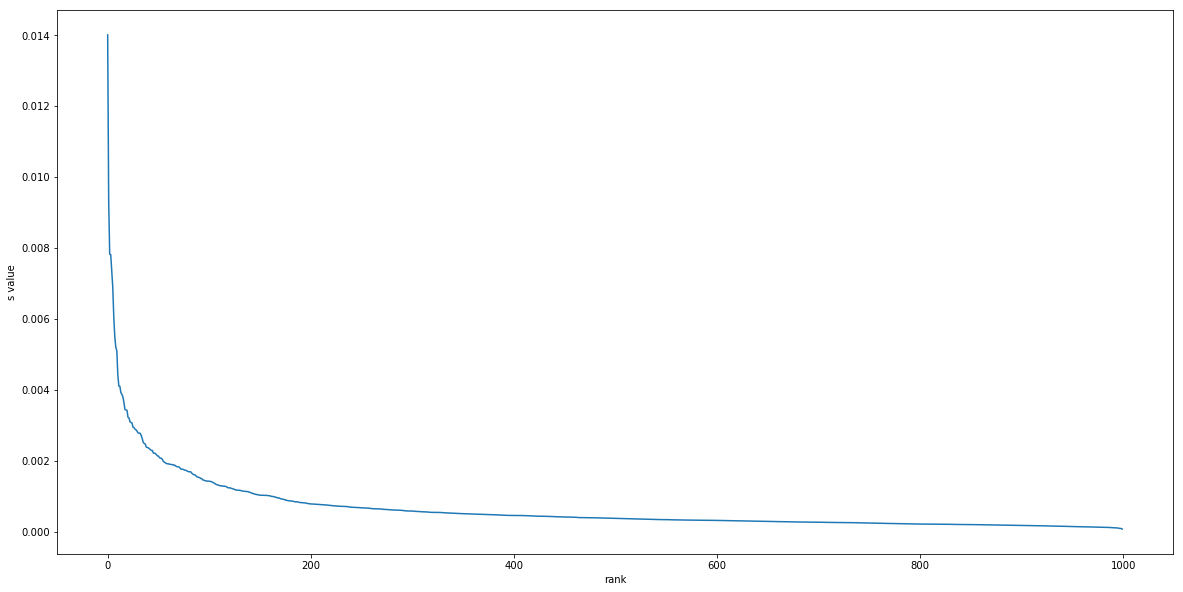

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

In [56]:
s_value

[0.007811575334359095,
 0.0003180122116689281,
 0.0003251642935377875,
 0.0002684707903780069,
 0.000179507992007992,
 0.00028935185185185184,
 0.014002732240437158,
 0.0002106377462841341,
 0.0014117826617826618,
 0.0001365112160566706,
 0.0005005411255411255,
 0.00014249073810202338,
 0.0002878045157456922,
 0.00025241216463786994,
 0.00026850055432372507,
 0.0024719841793012527,
 0.0005628283165179688,
 0.0005659902733523394,
 0.00021546220633299285,
 0.0003118070953436807,
 0.00018552875695732838,
 0.00041035353535353534,
 0.004103535353535354,
 0.00044007886213209406,
 0.0002670027341079973,
 0.00020668986186227567,
 0.000585308750365818,
 0.0003263151921003348,
 0.0005940082644628099,
 0.00031742088629431816,
 0.0002475034435261708,
 0.00038528221922558276,
 0.0003192338387869114,
 0.0002262224089454804,
 0.00019624700956937798,
 0.00031469160222981476,
 0.001010733022091736,
 0.00032067433231022953,
 0.0003924133420536298,
 0.00018744142455482662,
 0.0005143025078369906,
 0.0001

In [58]:
s_value_top_5 = sorted(s_value, reverse=True)[:6]
s_value_top_5

[0.014002732240437158,
 0.009283819628647215,
 0.007820136852394917,
 0.007811575334359095,
 0.007331378299120235,
 0.006896551724137931]

In [62]:
print(s_value.index(s_value_top_5[0]))
print(s_value.index(s_value_top_5[1]))
print(s_value.index(s_value_top_5[2]))
print(s_value.index(s_value_top_5[3]))
print(s_value.index(s_value_top_5[4]))

6
436
77
0
87


In [64]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[0]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'klebb':
        print(i,j)
    elif i ==  'rosa':
        print(i,j)

('klebb', 'rosa') 41
klebb 61
rosa 48


In [66]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[1]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'full':
        print(i,j)
    elif i ==  'moon':
        print(i,j)

('full', 'moon') 7
full 29
moon 26


In [68]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[2]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'secret':
        print(i,j)
    elif i ==  'servic':
        print(i,j)

('secret', 'servic') 16
secret 66
servic 31


In [72]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[3]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'g.':
        print(i,j)
    elif i ==  'gener':
        print(i,j)

('g.', 'gener') 66
gener 119
g. 71


In [74]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[4]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'secret':
        print(i,j)
    elif i ==  'service':
        print(i,j)

('secret', 'service') 15
secret 66
service 31


In [75]:
from math import log
log_list = [log(y,10) for y in s_value]
log_list

[-2.1072613745697373,
 -3.4975562027872575,
 -3.4878971505653564,
 -3.5711029586337757,
 -3.745916211109594,
 -3.5385737338068557,
 -1.8537872156666184,
 -3.67646380060537,
 -2.8502321560133295,
 -3.864831664583618,
 -3.300560234145055,
 -3.8462133638793867,
 -3.540902396125438,
 -3.5978897187314085,
 -3.571054813355537,
 -2.6069543130590116,
 -3.2496240608496945,
 -3.247191032178695,
 -3.6666288972920187,
 -3.5061140064225222,
 -3.7315887651867383,
 -3.386841820610619,
 -2.386841820610619,
 -3.3564694909686508,
 -3.5734842914371603,
 -3.6846808249946306,
 -3.2326149831347815,
 -3.4863627065009535,
 -3.226207512618763,
 -3.49836450006405,
 -3.606418754330369,
 -3.4142210332148677,
 -3.495891079666187,
 -3.645464377309169,
 -3.7071969523529646,
 -3.5021148463906058,
 -2.9953635450462794,
 -3.4939358008515744,
 -3.406256235028676,
 -3.727134423760488,
 -3.28878135797113,
 -3.7049051555733805,
 -3.242777393792862,
 -3.4858278581649706,
 -3.0546130545568873,
 -3.5677319625480686,
 -3.16979

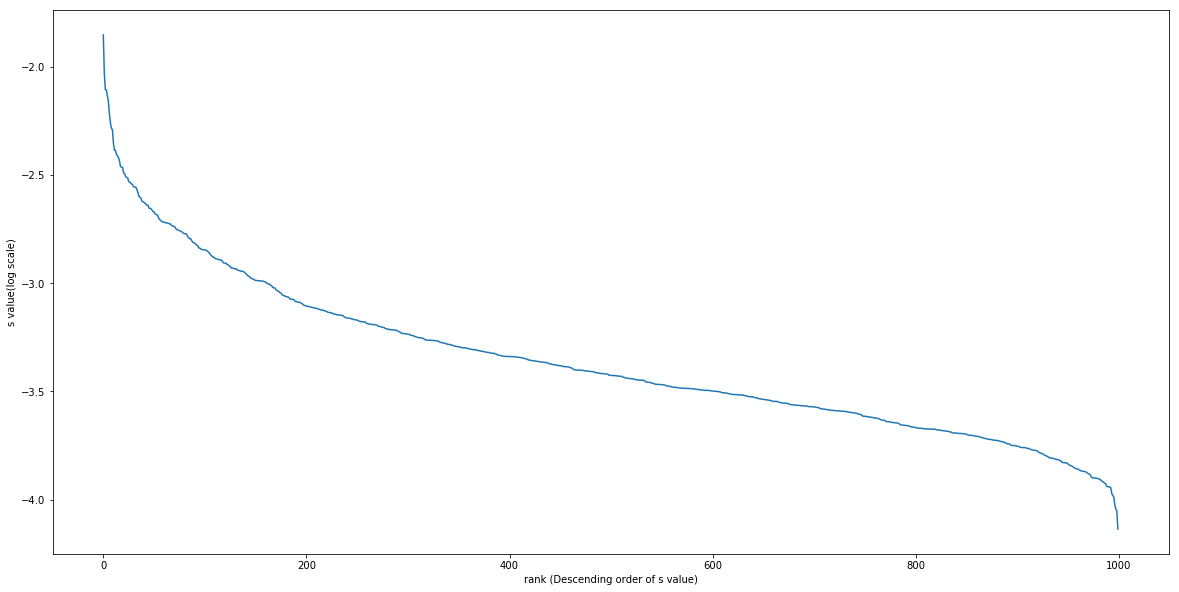

In [76]:
#take a log
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_list, reverse=True))

plt.ylabel('s value(log scale)')
plt.xlabel('rank (Descending order of s value)')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


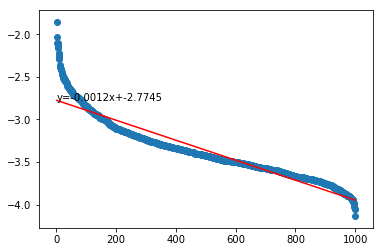

In [77]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(log_list)+1)
y = sorted(log_list, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

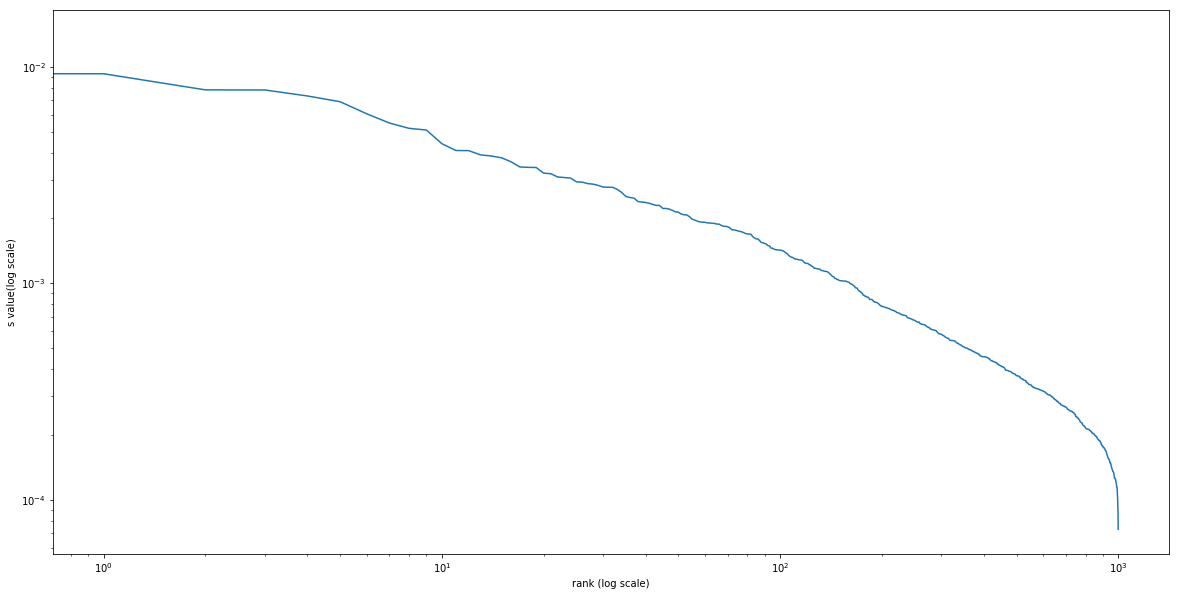

In [78]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('s value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

In [80]:
from math import log

sorted_list = sorted(s_value, reverse=True)
sorted_list

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_value)+1)]

In [81]:
np.array(log_list[:-10])
np.array(log_x[:-10])

array([ 0.        ,  0.69314718,  1.09861229,  1.38629436,  1.60943791,
        1.79175947,  1.94591015,  2.07944154,  2.19722458,  2.30258509,
        2.39789527,  2.48490665,  2.56494936,  2.63905733,  2.7080502 ,
        2.77258872,  2.83321334,  2.89037176,  2.94443898,  2.99573227,
        3.04452244,  3.09104245,  3.13549422,  3.17805383,  3.21887582,
        3.25809654,  3.29583687,  3.33220451,  3.36729583,  3.40119738,
        3.4339872 ,  3.4657359 ,  3.49650756,  3.52636052,  3.55534806,
        3.58351894,  3.61091791,  3.63758616,  3.66356165,  3.68887945,
        3.71357207,  3.73766962,  3.76120012,  3.78418963,  3.80666249,
        3.8286414 ,  3.8501476 ,  3.87120101,  3.8918203 ,  3.91202301,
        3.93182563,  3.95124372,  3.97029191,  3.98898405,  4.00733319,
        4.02535169,  4.04305127,  4.06044301,  4.07753744,  4.09434456,
        4.11087386,  4.12713439,  4.14313473,  4.15888308,  4.17438727,
        4.18965474,  4.20469262,  4.21950771,  4.2341065 ,  4.24

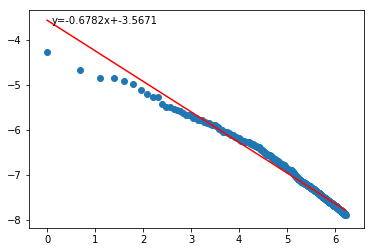

In [89]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = np.array(log_x[:-500])
y = np.array(log_list[:-500])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

In [90]:
# i,j count
import numpy as np

len(word_f)

7169

In [91]:
i = np.arange(len(word_f), 0, -1)
j = np.arange(1,len(word_f)+1, 1)

In [92]:
def square(list):
    return [i ** -2 for i in list]
square(i)

[1.9457311835001374e-08,
 1.9462741151147958e-08,
 1.9468172740084378e-08,
 1.9473606603079368e-08,
 1.9479042741402561e-08,
 1.9484481156324459e-08,
 1.9489921849116469e-08,
 1.9495364821050877e-08,
 1.9500810073400854e-08,
 1.9506257607440465e-08,
 1.9511707424444668e-08,
 1.9517159525689306e-08,
 1.9522613912451113e-08,
 1.9528070586007714e-08,
 1.9533529547637638e-08,
 1.9538990798620297e-08,
 1.9544454340235998e-08,
 1.9549920173765948e-08,
 1.9555388300492244e-08,
 1.9560858721697882e-08,
 1.9566331438666761e-08,
 1.9571806452683672e-08,
 1.9577283765034303e-08,
 1.9582763377005244e-08,
 1.9588245289883995e-08,
 1.9593729504958939e-08,
 1.9599216023519374e-08,
 1.9604704846855495e-08,
 1.9610195976258406e-08,
 1.9615689413020109e-08,
 1.9621185158433516e-08,
 1.9626683213792439e-08,
 1.9632183580391603e-08,
 1.9637686259526633e-08,
 1.964319125249407e-08,
 1.9648698560591361e-08,
 1.9654208185116856e-08,
 1.9659720127369822e-08,
 1.9665234388650436e-08,
 1.9670750970259791e-08,
 

In [98]:
middle = len(square(j)) / 2
print(int(meddle))

middle = len(square(i)) / 2
print (int(meddle))

3584
3584


In [96]:
square(j)[int(middle)]

7.7807539161507054e-08

In [99]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (int(middle)**2) / (x)

myu = integrate.quad(computePi, 1, int(middle)**2)

In [100]:
# 結果にはintegrated value and estimation error
myu

(210253907.98079064, 0.0010228617619834068)

In [101]:
(3584**2) * log(3584**2)

210253907.98079064

In [102]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (7.7807539161507054e-08**2) / (x)

myu = integrate.quad(computePi, 1, (7.7807539161507054e-08**2))
print(myu)

(-5.088867849448204e-14, 5.660841546213926e-14)
